# connect to ES

In [7]:
from bluesearch.k8s.connect import connect

In [8]:
client = connect()

/home/reissant/miniforge3/envs/py10/lib/python3.10/site-packages/elasticsearch/_sync/client/__init__.py:395: SecurityWarning: Connecting to 'https://ml-elasticsearch.kcp.bbp.epfl.ch:443' using TLS with verify_certs=False is insecure
  _transport = transport_class(


# tokenize all the paragraphs

In [9]:
import tqdm
from elasticsearch.helpers import scan

In [10]:
from transformers import AutoTokenizer

In [11]:
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/multi-qa-MiniLM-L6-cos-v1")

In [16]:
lens = []
progress = tqdm.tqdm(position=0, unit=" Docs", desc="Scanning paragraphs")
body = {"query":{"match_all":{}}}
for hit in scan(client, query=body, index="paragraphs"):
    emb = tokenizer.tokenize(hit['_source']['text'])
    lens.append(len(emb))
    progress.update(1)

Scanning paragraphs: 1 Docs [23:25, 1405.53s/ Docs]
Scanning paragraphs: 294 Docs [00:00, 2936.98 Docs/s]Token indices sequence length is longer than the specified maximum sequence length for this model (825 > 512). Running this sequence through the model will result in indexing errors
Scanning paragraphs: 16006 Docs [00:06, 2740.84 Docs/s]

# plot results

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1ef025d390>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1ef025d930>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1ef025d0c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1ef025ded0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1ef025e1a0>],
 'means': []}

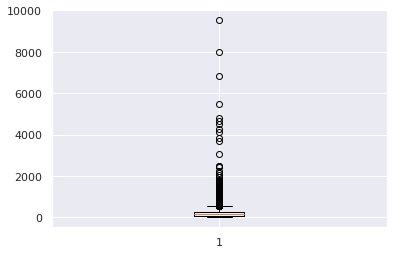

In [21]:
plt.boxplot(lens)

(0.0, 512.0)

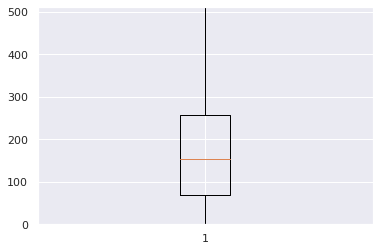

In [22]:
plt.boxplot(lens)
plt.ylim([0, 512])

(array([1.6098e+04, 8.1000e+01, 8.0000e+00, 2.0000e+00, 5.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 9.5580e+02, 1.9106e+03, 2.8654e+03, 3.8202e+03,
        4.7750e+03, 5.7298e+03, 6.6846e+03, 7.6394e+03, 8.5942e+03,
        9.5490e+03]),
 <BarContainer object of 10 artists>)

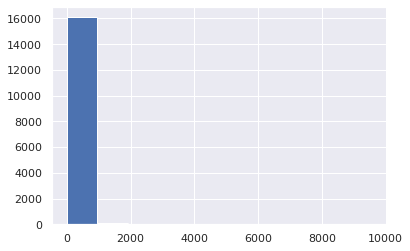

In [23]:
plt.hist(lens)

(array([5.350e+03, 4.437e+03, 3.134e+03, 1.586e+03, 7.940e+02, 3.920e+02,
        1.830e+02, 1.170e+02, 7.600e+01, 2.900e+01, 2.200e+01, 1.500e+01,
        1.100e+01, 1.100e+01, 4.000e+00, 4.000e+00, 6.000e+00, 6.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

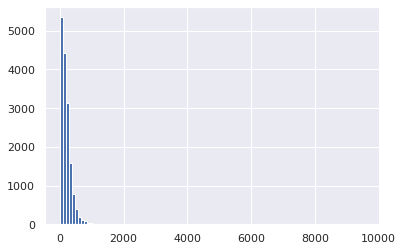

In [24]:
plt.hist(lens, bins=100)

(0.0, 512.0)

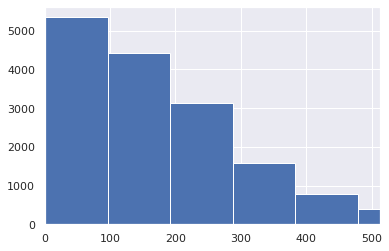

In [25]:
plt.hist(lens, bins=100)
plt.xlim([0, 512])

In [28]:
import numpy as np

In [32]:
lens=np.array(lens)

In [36]:
len(lens[np.array(lens)>512]) / len(lens) * 100

4.475584912648929

# get biggest paragraphs

In [47]:
paragraphs = []
progress = tqdm.tqdm(position=0, unit=" Docs", desc="Scanning paragraphs")
body = {"query":{"match_all":{}}}
for hit in scan(client, query=body, index="paragraphs"):
    emb = tokenizer.tokenize(hit['_source']['text'])
    hit['_source']['tokenizer'] = ', '.join(emb)
    progress.update(1)
    if len(emb) > 1000:
        paragraphs.append(hit['_source'])

Scanning paragraphs: 16199 Docs [01:21, 199.60 Docs/s] 
Scanning paragraphs: 15986 Docs [00:06, 2773.05 Docs/s]

In [48]:
paragraphs

[{'article_id': 'a155049713201921a7cc41b64ccbf8fc',
  'section_name': 'Many other peptides in gonadotrophs may stimulate lactotroph function, but none have been shown to be involved yet',
  'text': 'An impressive number of peptides have been identified in gonadotrophs and, as they are secreted (183), they are potential candidates for a paracrine action on lactotrophs (Fig. 1), namely angiotensin II (184), neurotensin (185, 186), pituitary adenylate cyclase-activating peptide (PACAP) (187, 188), calcitonin (189), calcitonin gene-related peptide (CGRP) (190), atrial natriuretic peptide (ANP) (191), C-type natriuretic peptide (CNP) (192), proenkephalin A and B-derived peptides (193–195), cocaine and amphetamine-regulated transcript (CART) (196), NPY (197), endothelins (ET) (198, 199) and leptin (200, 201). TRH has been located in gonadotrophs maintained in culture, although this observation was not confirmed yet (202). Among these peptides, angiotensin II (184) and neurotensin (203–206) h

Scanning paragraphs: 16199 Docs [00:16, 2773.05 Docs/s]